<a href="https://colab.research.google.com/github/KhamdGek/ML-W-PYTHON/blob/master/ML_assignment1.2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



> #    **DESCISION TREE VS. RANDOM FOREST ON Car Evaluation Data Set**




# **LIBRARY IMPORT**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns     
sns.set()
import statsmodels as sm  
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV  # for data splitting and parameter tuning
from sklearn.tree import DecisionTreeRegressor  # enables us to perform regression using a decision tree
from sklearn.ensemble import RandomForestRegressor # ensemble methods for regression
from sklearn.metrics import r2_score,mean_squared_error   # for scoring the model and calculating the mean squared error
from sklearn import preprocessing  # for data preprocessing and scaling
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')


# **DATA IMPORT**

In [3]:
from google.colab import files
uploaded = files.upload()


Saving car.csv to car.csv


# **DATA CLEANING**

1. REMOVING SOME NON IMPORTANT COLOMNS. 
2. SPLITTING THE DATA INTO TRAIN TEST WITH 70/30
3. RANDOM SHUFFLING THE DATA AND STORING INTO THREE STIRNGS

In [5]:
import io
df1 = pd.read_csv(io.BytesIO(uploaded['car.csv']))
df1.shape

(1728, 7)

In [6]:
df1.drop(df1.columns[9:],axis=1,inplace=True)
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df1.columns = col_names
col_names
df1.head() 

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [7]:
df1['class'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

# **DATA SHUFFLING**

In [8]:
# check missing values in variables
df1.isnull().sum()
import random
from random import shuffle
shuffled_df = df1.sample(frac=1)
shuffled_df2 = df1.sample(frac=1)
shuffled_df3 = df1.sample(frac=1)
shuffled_df.to_csv("car1.csv", index=False)
shuffled_df2.to_csv("car2.csv", index=False)
shuffled_df3.to_csv("car3.csv", index=False)
df1=pd.read_csv("car1.csv")
df2=pd.read_csv("car2.csv")
df3=pd.read_csv("car3.csv")


In [67]:
# Let's visualize the relationships between the Mileage Per Galon(mpg) of a car and the other features.
import seaborn as sns 
plt.figure(figsize=(10,6))
sns.heatmap(df2.corr(),cmap=plt.cm.Reds,annot=True)
plt.title('Heatmap displaying the relationship between\nthe features of the data',fontsize=13)
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [9]:
df1.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,high,low,4,more,big,med,acc
1,high,vhigh,4,4,med,high,unacc
2,med,low,3,2,small,low,unacc
3,high,high,3,2,med,low,unacc
4,high,high,4,4,med,med,acc


In [10]:
df2.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,low,4,4,big,low,unacc
1,high,high,3,more,med,high,acc
2,med,low,3,4,big,med,good
3,vhigh,low,2,4,big,high,acc
4,med,high,3,2,small,high,unacc


In [11]:
df3.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,high,med,2,more,small,low,unacc
1,low,med,4,4,big,high,vgood
2,low,med,4,2,big,low,unacc
3,high,high,3,2,small,low,unacc
4,low,med,5more,2,small,low,unacc


# **NON-IMPORTANT COLOMN REMOVAL TO IMPROVE ACCURACY**

In [45]:
X = df1.drop(['class',], axis=1)
y = df1['class']

In [46]:
X2 = df2.drop(['class'], axis=1)
y2 = df2['class']

In [47]:
X3 = df3.drop(['class'], axis=1)
y3 = df3['class']

# **TRAIN/TEST SPLIT INTO 70/30 RATIO**

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)
X_train.shape, X_test.shape

((1209, 6), (519, 6))

In [49]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.30, random_state = 42)
X_train2.shape, X_test2.shape

((1209, 6), (519, 6))

In [50]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size = 0.30, random_state = 42)
X_train3.shape, X_test3.shape

((1209, 6), (519, 6))

In [51]:
X_train3.head()

,buying,maint,doors,persons,lug_boot,safety
1178,vhigh,vhigh,3,more,big,high
585,high,high,5more,2,small,med
1552,med,med,2,4,small,med
1169,med,vhigh,5more,more,big,med
1033,high,vhigh,2,2,small,med


# **CONVERSION OF STING TO INT IN DATA**

In [52]:
!pip install category_encoders

In [69]:
# import category encoders
import category_encoders as ce
# encode variables with ordinal encoding
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'persons', 'lug_boot', 'safety','doors'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)
X_train2 = encoder.fit_transform(X_train2)
X_test2 = encoder.transform(X_test2)
X_train3 = encoder.fit_transform(X_train3)
X_test3 = encoder.transform(X_test3)

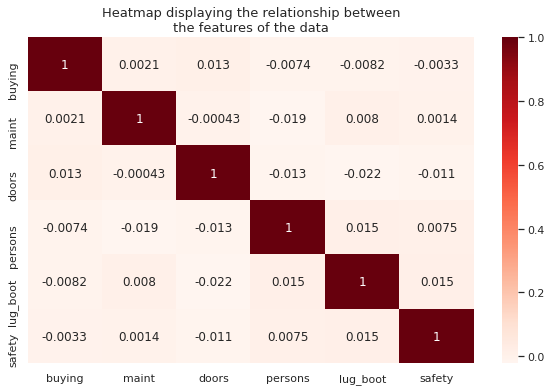

In [71]:
# Let's visualize the relationships between the Mileage Per Galon(mpg) of a car and the other features.
import seaborn as sns 
plt.figure(figsize=(10,6))
sns.heatmap(X_train.corr(),cmap=plt.cm.Reds,annot=True)
plt.title('Heatmap displaying the relationship between\nthe features of the data',fontsize=13)
plt.show()

# **Decision Tree Classifier**

# Decision Tree Classifier **MODEL FITTING**

In [131]:
# import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
# instantiate the DecisionTreeClassifier model with criterion gini index
clf_gini = DecisionTreeClassifier(criterion='entropy', max_depth=15, random_state=0)
# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=15, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [132]:
# instantiate the DecisionTreeClassifier model with criterion gini index
clf_gini2 = DecisionTreeClassifier(criterion='entropy', max_depth=15, random_state=0)
# fit the model
clf_gini2.fit(X_train2, y_train2)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=15, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [133]:
# instantiate the DecisionTreeClassifier model with criterion gini index
clf_gini3 = DecisionTreeClassifier(criterion='entropy', max_depth=15, random_state=0)
# fit the model
clf_gini3.fit(X_train3, y_train3)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=15, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [134]:
y_pred_gini = clf_gini.predict(X_test)
y_pred_gini2 = clf_gini2.predict(X_test2)
y_pred_gini3 = clf_gini3.predict(X_test3)
y_pred_train_gini = clf_gini.predict(X_train)
y_pred_train_gini2 = clf_gini2.predict(X_train2)
y_pred_train_gini3 = clf_gini3.predict(X_train3)


In [135]:
# Print the Confusion Matrix and slice it into four pieces
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_gini)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[ 96   2   2   3]
 [  5  16   2   1]
 [  4   1 367   0]
 [  2   2   0  16]]


In [136]:
cm = confusion_matrix(y_test2, y_pred_gini2)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[110   1   0   2]
 [  1  17   0   3]
 [  4   0 366   0]
 [  1   0   0  14]]


In [137]:
cm = confusion_matrix(y_test3, y_pred_gini3)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[117   0   6   3]
 [  4  13   1   0]
 [  4   2 345   0]
 [  0   0   0  24]]


# **CLASSIFICATION REPORT** FOR DESCISION TREE

In [138]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_gini))

              precision    recall  f1-score   support

         acc       0.90      0.93      0.91       103
        good       0.76      0.67      0.71        24
       unacc       0.99      0.99      0.99       372
       vgood       0.80      0.80      0.80        20

    accuracy                           0.95       519
   macro avg       0.86      0.85      0.85       519
weighted avg       0.95      0.95      0.95       519



In [139]:
print(classification_report(y_test2, y_pred_gini2))

              precision    recall  f1-score   support

         acc       0.95      0.97      0.96       113
        good       0.94      0.81      0.87        21
       unacc       1.00      0.99      0.99       370
       vgood       0.74      0.93      0.82        15

    accuracy                           0.98       519
   macro avg       0.91      0.93      0.91       519
weighted avg       0.98      0.98      0.98       519



In [140]:
print(classification_report(y_test3, y_pred_gini3))

              precision    recall  f1-score   support

         acc       0.94      0.93      0.93       126
        good       0.87      0.72      0.79        18
       unacc       0.98      0.98      0.98       351
       vgood       0.89      1.00      0.94        24

    accuracy                           0.96       519
   macro avg       0.92      0.91      0.91       519
weighted avg       0.96      0.96      0.96       519



# **RANDOM FOREST CLASSIFIER**

# RANDOM FOREST **MODEL FITTING**

In [181]:
# import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
# instantiate the classifier 
rfc = RandomForestClassifier(n_estimators=100,random_state=0)
rfc2 = RandomForestClassifier(n_estimators=100,random_state=0)
rfc3 = RandomForestClassifier(n_estimators=100,random_state=0)
# fit the model
rfc.fit(X_train, y_train)
rfc2.fit(X_train2, y_train2)
rfc3.fit(X_train3, y_train3)
# Predict the Test set results
y_pred = rfc.predict(X_test)
y_pred2 = rfc2.predict(X_test2)
y_pred3 = rfc3.predict(X_test3)


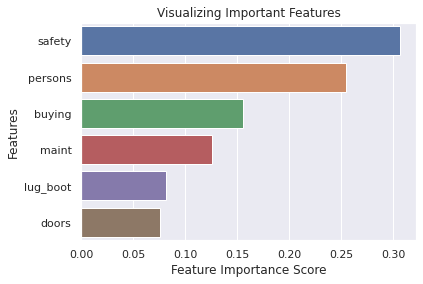

In [182]:
feature_scores = pd.Series(rfc.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores
# Creating a seaborn bar plot
sns.barplot(x=feature_scores, y=feature_scores.index)
# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
# Add title to the graph
plt.title("Visualizing Important Features")
# Visualize the graph
plt.show()

# **CONFUSION MATRIX** OF RANDOM FOREST

In [183]:
cm4 = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm4)

Confusion matrix

 [[100   1   0   2]
 [  4  18   0   2]
 [  8   1 363   0]
 [  2   0   0  18]]


In [184]:
cm5 = confusion_matrix(y_test2, y_pred2)
print('Confusion matrix\n\n', cm5)

Confusion matrix

 [[110   1   0   2]
 [  2  16   0   3]
 [  8   0 362   0]
 [  1   0   0  14]]


In [185]:
cm6 = confusion_matrix(y_test3, y_pred3)
print('Confusion matrix\n\n', cm6)

Confusion matrix

 [[121   2   2   1]
 [  1  16   0   1]
 [  6   2 343   0]
 [  5   0   0  19]]


# **CLASSIFICATION REPORT** FOR RANDOM FOREST

In [186]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         acc       0.88      0.97      0.92       103
        good       0.90      0.75      0.82        24
       unacc       1.00      0.98      0.99       372
       vgood       0.82      0.90      0.86        20

    accuracy                           0.96       519
   macro avg       0.90      0.90      0.90       519
weighted avg       0.96      0.96      0.96       519



In [187]:
print(classification_report(y_test2, y_pred2))

              precision    recall  f1-score   support

         acc       0.91      0.97      0.94       113
        good       0.94      0.76      0.84        21
       unacc       1.00      0.98      0.99       370
       vgood       0.74      0.93      0.82        15

    accuracy                           0.97       519
   macro avg       0.90      0.91      0.90       519
weighted avg       0.97      0.97      0.97       519



In [188]:
print(classification_report(y_test3, y_pred3))

              precision    recall  f1-score   support

         acc       0.91      0.96      0.93       126
        good       0.80      0.89      0.84        18
       unacc       0.99      0.98      0.99       351
       vgood       0.90      0.79      0.84        24

    accuracy                           0.96       519
   macro avg       0.90      0.90      0.90       519
weighted avg       0.96      0.96      0.96       519



# **CONCLUSION**
Comparing the results of both Descision Tree and Random Forest 

In [193]:
number_list1 = [clf_gini.score(X_train, y_train),clf_gini2.score(X_train2, y_train2),clf_gini3.score(X_train3, y_train3)]
avg_train = sum(number_list4)/len(number_list1)
print("The average Train set score for Descision tree is ", round(avg_train,2))
number_list2 = [clf_gini.score(X_test, y_test),clf_gini2.score(X_test2, y_test2),clf_gini3.score(X_test3, y_test3)]
avg_test = sum(number_list5)/len(number_list2)
print("The average Test set score for Descision tree is ", round(avg_test,2))
number_list3 = [accuracy_score(y_test, y_pred_gini),accuracy_score(y_test2, y_pred_gini2),accuracy_score(y_test3, y_pred_gini3)]
avg_model = sum(number_list6)/len(number_list3)
print("The average overall model accuracy score for Descision tree is ", round(avg_model,2))

The average Train set score for Descision tree is  1.0
The average Test set score for Descision tree is  0.96
The average overall model accuracy score for Descision tree is  0.96


In [194]:
number_list4 = [rfc.score(X_train, y_train),rfc2.score(X_train2, y_train2),rfc3.score(X_train3, y_train3)]
avg_train = sum(number_list4)/len(number_list4)
print("The average Train set score for Random Forest is ", round(avg_train,2))
number_list5 = [rfc.score(X_test, y_test),rfc2.score(X_test2, y_test2),rfc3.score(X_test3, y_test3)]
avg_test = sum(number_list5)/len(number_list5)
print("The average Test set score for Random forest is ", round(avg_test,2))
number_list6 = [accuracy_score(y_test, y_pred),accuracy_score(y_test2, y_pred2),accuracy_score(y_test3, y_pred3)]
avg_model = sum(number_list6)/len(number_list6)
print("The average overall model accuracy score for random forest is ", round(avg_model,2))

The average Train set score for Random Forest is  1.0
The average Test set score for Random forest is  0.96
The average overall model accuracy score for random forest is  0.96


T-test for Model Accuracy Ttest_indResult(statistic=0.09090909090908646, pvalue=0.931935320643594)


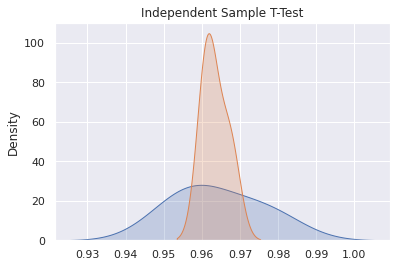

In [199]:
#T-test
#statisticfloat or array
##The calculated t-statistic.

#pvaluefloat or array
##The two-tailed p-value

import numpy as np
from scipy import stats
sns.kdeplot(number_list3, shade=True)
sns.kdeplot(number_list6, shade=True)
plt.title("Independent Sample T-Test")
print("T-test for Model Accuracy",stats.ttest_ind(number_list3,number_list6))